In [1]:
import pandas as pd
import test_main

results = []
for seed in range(100000):
    try:
        results.append(test_main.test_random_battleships(seed, True))
    except:
        pass # Excludes failures
pd.DataFrame(data=results, columns=['num_attacks', 'board']).to_csv('results.csv', index=False)

In [2]:
import ast
import numpy as np

results = pd.read_csv('results.csv')
results['board'] = results['board'].apply(ast.literal_eval)
results['board'] = results['board'].apply(np.array)
results.head()

,num_attacks,board
0,40,"[[None, None, None, None, None, None, None, No..."
1,44,"[[None, None, None, None, None, None, None, No..."
2,57,"[[None, None, None, None, None, None, Cruiser,..."
3,33,"[[None, None, None, None, None, None, None, No..."
4,67,"[[None, None, None, None, None, None, None, No..."


In [3]:
difficult_boards = results.sort_values('num_attacks').tail()['board']
print('Difficult Boards:\n')
for board in difficult_boards:
    for col in board:
        print(col)
    print()

Difficult Boards:

[None None None None None None None 'Destroyer' None 'Submarine']
[None None None None None None None 'Destroyer' None 'Submarine']
[None None None None None None None None None 'Submarine']
[None None None None None None None None None None]
[None None None None None None None None None None]
[None None None None None None 'Battleship' 'Battleship' 'Battleship'
 'Battleship']
[None None None None None None None None None 'Cruiser']
[None None None None None None None None None 'Cruiser']
[None None None None None None None None None 'Cruiser']
[None None 'Aircraft_Carrier' 'Aircraft_Carrier' 'Aircraft_Carrier'
 'Aircraft_Carrier' 'Aircraft_Carrier' None None None]

[None None None None None None None None None None]
[None None None None None None None None None None]
[None None None None None None None None None None]
[None None None None 'Submarine' None None 'Aircraft_Carrier' None None]
[None None None None 'Submarine' None None 'Aircraft_Carrier' None None]
[Non

42.62688507540302

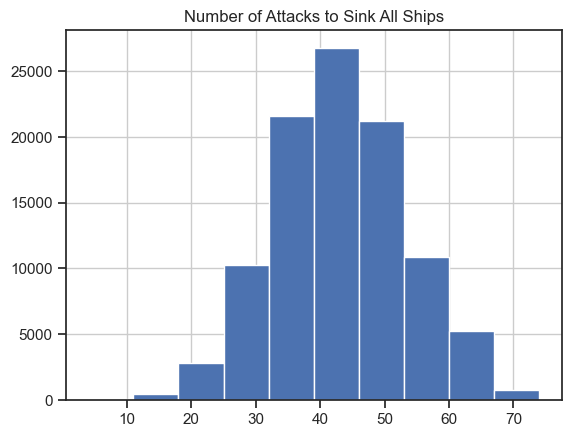

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme('notebook')
sns.set_style('ticks')
results['num_attacks'].hist()
plt.title('Number of Attacks to Sink All Ships')
results['num_attacks'].mean()

In [5]:
results['board'][results['num_attacks'] >= 70]

456      [[None, None, None, None, Aircraft_Carrier, Cr...
1316     [[None, None, None, None, None, None, None, No...
1362     [[None, None, None, None, None, None, None, No...
2601     [[None, None, None, None, None, None, None, No...
2865     [[None, None, None, Battleship, None, None, No...
                               ...                        
95667    [[None, None, None, None, None, None, None, No...
96044    [[None, None, Destroyer, Destroyer, None, None...
97218    [[Aircraft_Carrier, Aircraft_Carrier, Aircraft...
97807    [[None, None, Destroyer, Destroyer, None, None...
99829    [[None, None, None, None, None, None, None, No...
Name: board, Length: 115, dtype: object